# Deep Learning Model


1. Load our train and test dataset
2. Base Model
3. Define X and Y
4. Need to scale the data before we build our models
5. Building Model using deep learning
6. Metrics
7. Summary

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#boosting
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

from datetime import datetime

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,Activation
from tensorflow.keras import utils
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam

### 1. Load our train and test dataset

In [58]:
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

In [59]:
df_train.shape

(10188, 187)

In [60]:
df_test.shape

(1132, 187)

## 2. Base Model

In [61]:
df_test["label"].value_counts(normalize=True)

disgust      0.143993
fear         0.143993
happy        0.143993
sad          0.143993
angry        0.143993
surprised    0.143993
neutral      0.136042
Name: label, dtype: float64

In [62]:
df_train["label"].value_counts(normalize=True)

fear         0.143993
happy        0.143993
surprised    0.143993
sad          0.143993
angry        0.143993
disgust      0.143993
neutral      0.136042
Name: label, dtype: float64

***Base Model is around 14%***

### 3. Define X and Y

In [86]:
#since we already split our data to train and test in the prior notebook, we will just assign the values accordingly
X_train = df_train.drop(columns=["label", "file"])
y_train = df_train["label"]

X_test = df_test.drop(columns=["label", "file"])
y_test = df_test["label"]

### 4. Need to scale the data before we build our models

In [87]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# fix for data compatibility
X_train_exp = np.expand_dims(X_train_scaled, axis=2)
X_test_exp = np.expand_dims(X_test_scaled, axis=2)

In [89]:
X_train_exp.shape

(10188, 185, 1)

In [90]:
X_test_exp.shape

(1132, 185, 1)

In [91]:
y_train

0           fear
1           fear
2           fear
3          happy
4          happy
          ...   
10183    neutral
10184    neutral
10185      angry
10186      angry
10187      angry
Name: label, Length: 10188, dtype: object

In [92]:
#onehotencoding
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.transform(np.array(y_test).reshape(-1,1)).toarray()

In [93]:
encoder.categories_

[array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'],
       dtype=object)]

In [94]:
y_train.shape

(10188, 7)

In [95]:
y_test.shape

(1132, 7)

In [96]:
y_test[0]

array([0., 0., 0., 0., 1., 0., 0.])

### 5. Building Models

In [17]:
#opt = Adam(learning_rate=0.0005)

model = Sequential()
model.add(Conv1D(256, 7, padding='same', input_shape=(X_test_exp.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 7, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(7)))
model.add(Conv1D(128, 7, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 7, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 7, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 7, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(7)))
model.add(Conv1D(64, 7, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 7, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1])) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    

In [18]:
model.summary()

history=model.fit(X_train_exp, y_train, batch_size=64, epochs=50, validation_data=(X_test_exp, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 256)          2048      
                                                                 
 activation (Activation)     (None, 185, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 185, 256)          459008    
                                                                 
 batch_normalization (BatchN  (None, 185, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 185, 256)          0         
                                                                 
 dropout (Dropout)           (None, 185, 256)          0         
                                                        

Epoch 30/50
160/160 [==============================] - 45s 283ms/step - loss: 0.0838 - accuracy: 0.9710 - val_loss: 0.5863 - val_accuracy: 0.8525
Epoch 31/50
160/160 [==============================] - 44s 277ms/step - loss: 0.0649 - accuracy: 0.9776 - val_loss: 0.6809 - val_accuracy: 0.8419
Epoch 32/50
160/160 [==============================] - 43s 272ms/step - loss: 0.0582 - accuracy: 0.9796 - val_loss: 0.6481 - val_accuracy: 0.8410
Epoch 33/50
160/160 [==============================] - 43s 267ms/step - loss: 0.0750 - accuracy: 0.9735 - val_loss: 0.7186 - val_accuracy: 0.8348
Epoch 34/50
160/160 [==============================] - 42s 265ms/step - loss: 0.0919 - accuracy: 0.9669 - val_loss: 0.6960 - val_accuracy: 0.8392
Epoch 35/50
160/160 [==============================] - 43s 272ms/step - loss: 0.0533 - accuracy: 0.9804 - val_loss: 0.7884 - val_accuracy: 0.8313
Epoch 36/50
160/160 [==============================] - 43s 272ms/step - loss: 0.0589 - accuracy: 0.9797 - val_loss: 0.7839 -

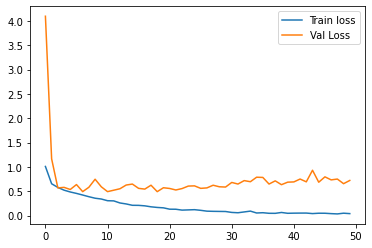

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

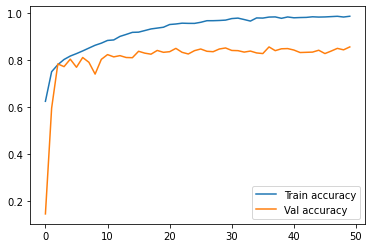

In [20]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [98]:
# predicting on test data.
pred_test = model.predict(X_test_exp)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

In [99]:
y_test[0]

array(['neutral'], dtype=object)

In [101]:
y_test[0]

array(['neutral'], dtype=object)

In [100]:
y_pred[0]

array(['neutral'], dtype=object)

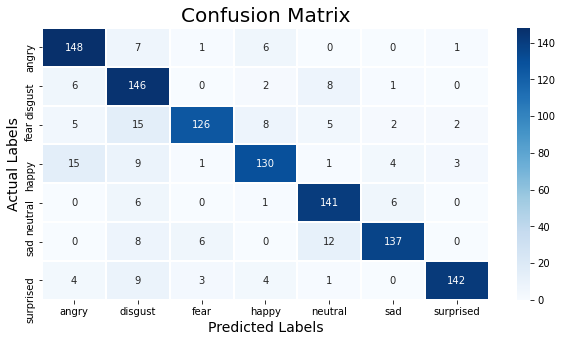

In [102]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.83      0.91      0.87       163
     disgust       0.73      0.90      0.80       163
        fear       0.92      0.77      0.84       163
       happy       0.86      0.80      0.83       163
     neutral       0.84      0.92      0.88       154
         sad       0.91      0.84      0.88       163
   surprised       0.96      0.87      0.91       163

    accuracy                           0.86      1132
   macro avg       0.86      0.86      0.86      1132
weighted avg       0.87      0.86      0.86      1132



## SAVING THE MODEL and Testing

In [104]:
from keras.models import load_model
model.save("ser.h5")
loaded_model = load_model("ser.h5")

In [105]:
pred = loaded_model.predict(X_test_exp)
y_pred = encoder.inverse_transform(pred)

In [106]:
y_pred[0]

array(['neutral'], dtype=object)

In [107]:
y_test[0]

array(['neutral'], dtype=object)

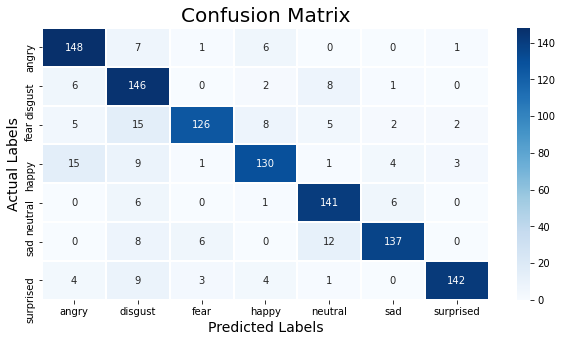

In [108]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.83      0.91      0.87       163
     disgust       0.73      0.90      0.80       163
        fear       0.92      0.77      0.84       163
       happy       0.86      0.80      0.83       163
     neutral       0.84      0.92      0.88       154
         sad       0.91      0.84      0.88       163
   surprised       0.96      0.87      0.91       163

    accuracy                           0.86      1132
   macro avg       0.86      0.86      0.86      1132
weighted avg       0.87      0.86      0.86      1132



## 7. SUMMARY